In [104]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
df = pd.read_csv("forestfires.csv") 

Text(0.5, 1.0, 'MSE of test data at each depth')

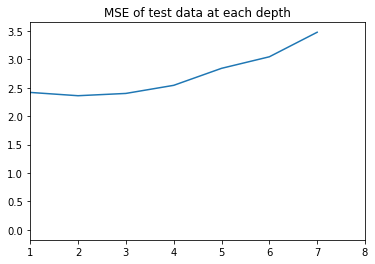

In [185]:
from sklearn import metrics
df.head()
df['logArea'] = np.log(df.area + 1)
X = df[df.columns[0:12]]
X = X._get_numeric_data()
y = df[df.columns[13:14]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

mseList = [0]
for i in range (1,8):
    dtReg = DecisionTreeRegressor(max_depth=i)
    dtReg.fit(X_train, y_train)
    y_pred = dtReg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)


plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")

In [195]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logArea
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


mse =  2.360241421835329
X[6] = Temp


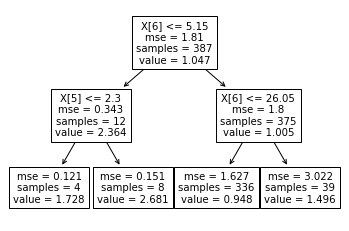

In [193]:
dtReg = DecisionTreeRegressor(max_depth=2)
dtReg.fit(X_train, y_train)
y_pred = dtReg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
tree.plot_tree(dtReg)
print("mse = ", mse)
print("X[6] = Temp")

2.6732217045980406


Text(0.5, 1.0, 'MSE of test data at each depth')

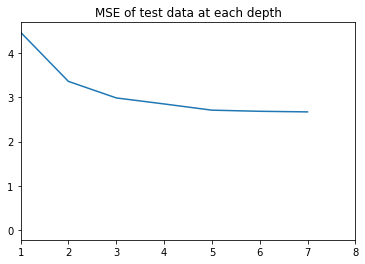

In [237]:
from sklearn import neighbors

mseList = [0]
for i in range (1,8):
    n_neighbors = i
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)

plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")


2.9896514285253053


Text(0.5, 1.0, 'y test (scatter) and knn predictions (line)')

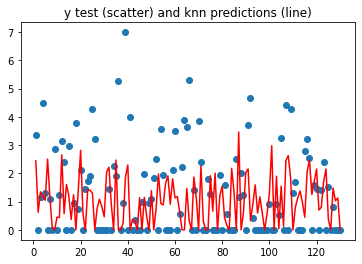

In [238]:
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
y_pred = knn.fit(X_train, y_train).predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mse

print(mse)
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.plot(x, y_pred, color = "red")
plt.title("y test (scatter) and knn predictions (line)")